# Web Scraping

In [ ]:
pip install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Make a GET request to the webpage URL
url = 'https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database/2022'
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the relevant HTML elements containing the air quality data
data_elements = soup.find_all("div", class_="air-quality-data")

timestamps = []
cities = []
pollutants = []
temperatures = []
humidities = []
wind_speeds = []

# Extract the required attributes from each data element
for element in data_elements:
    # Extract the data from each column of the element
    timestamp = element.find("span", class_="timestamp").text.strip()
    city = element.find("span", class_="city").text.strip()
    pollutant = element.find("span", class_="pollutant").text.strip()
    temperature = float(element.find("span", class_="temperature").text.strip())
    humidity = float(element.find("span", class_="humidity").text.strip())
    wind_speed = float(element.find("span", class_="wind-speed").text.strip())

    # Append the extracted data to the respective lists
    timestamps.append(timestamp)
    cities.append(city)
    pollutants.append(pollutant)
    temperatures.append(temperature)
    humidities.append(humidity)
    wind_speeds.append(wind_speed)

# Create a pandas DataFrame to store the extracted data
data = pd.DataFrame({
    'Timestamp': timestamps,
    'City': cities,
    'Pollutant': pollutants,
    'Temperature': temperatures,
    'Humidity': humidities,
    'Wind Speed': wind_speeds
})

# Print the extracted data
print(data)
df = pd.DataFrame(data)
df.to_csv('air_quality_data.csv', index=False)


Empty DataFrame
Columns: [Timestamp, City, Pollutant, Temperature, Humidity, Wind Speed]
Index: []


In [ ]:
df.head

<bound method NDFrame.head of Empty DataFrame
Columns: [Timestamp, City, Pollutant, Temperature, Humidity, Wind Speed]
Index: []>

In [ ]:
df.tail

<bound method NDFrame.tail of Empty DataFrame
Columns: [Timestamp, City, Pollutant, Temperature, Humidity, Wind Speed]
Index: []>

In [ ]:
df

,Timestamp,City,Pollutant,Temperature,Humidity,Wind Speed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    0 non-null      float64
 1   City         0 non-null      float64
 2   Pollutant    0 non-null      float64
 3   Temperature  0 non-null      float64
 4   Humidity     0 non-null      float64
 5   Wind Speed   0 non-null      float64
dtypes: float64(6)
memory usage: 124.0 bytes


In [ ]:
df.shape

(0, 6)

In [ ]:
import seaborn as sns

In [ ]:
df.isnull().values.any()

False

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

try:
    page = requests.get('https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database/2022')
    time.sleep(2)  # Delay for 2 seconds (optional)

    soup = BeautifulSoup(page.text, 'html.parser')
    links = soup.find_all('div', attrs={'class': 'arrowed-link'})

    # Process the links or perform other actions
    for link in links:
        print(link.text)

except Exception as e:
    print(e)


Air quality database - current version
Air quality database 2018
Air quality database 2016
Air quality database 2014
Air quality database 2011
Ambient air pollution data
Air quality standards tool
AirQ+ tool

Air quality and health


Environment, Climate Change and Health

WMO Global Atmospheric Watch
UNEP Actions on Air Quality
UNEP Regulating Air Quality
CCAC: Air Pollution in Asia and the Pacific: Science-based solutions
UNECE Guidance Document on Emission Control Techniques for Mobile Sources Under the Convention on Long-range Transboundary Air Pollution
European Environment Agency - Air Quality in Europe


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import time

try:
    page = requests.get('https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database/2022')
    time.sleep(2)  # Delay for 2 seconds (optional)

    soup = BeautifulSoup(page.text, 'html.parser')
    links = soup.find_all('div', attrs={'class': 'arrowed-link'})

    # Save data in a CSV file
    with open('data.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Link Text'])

        for link in links:
            writer.writerow([link.text])

    print("Data saved successfully.")

except Exception as e:
    print(e)


Data saved successfully.


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import time

try:
    page = requests.get('https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database/2022')
    time.sleep(2)  # Delay for 2 seconds (optional)

    soup = BeautifulSoup(page.text, 'html.parser')
    links = soup.find_all('div', attrs={'class': 'arrowed-link'})

    # Save data in a CSV file
    with open('air.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Link Text'])

        for link in links:
            writer.writerow([link.text])

    print("Data saved successfully.")

    # Read data from the CSV file and display top and bottom data
    with open('air.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)
        data = list(reader)

    # Display top data
    print("Top Data:")
    for row in data[:5]:
        print(row[0])

    # Display bottom data
    print("\nBottom Data:")
    for row in data[-5:]:
        print(row[0])

except Exception as e:
    print(e)


Data saved successfully.
Top Data:
Link Text
Air quality database - current version
Air quality database 2018
Air quality database 2016
Air quality database 2014

Bottom Data:
UNEP Actions on Air Quality
UNEP Regulating Air Quality
CCAC: Air Pollution in Asia and the Pacific: Science-based solutions
UNECE Guidance Document on Emission Control Techniques for Mobile Sources Under the Convention on Long-range Transboundary Air Pollution
European Environment Agency - Air Quality in Europe


In [ ]:
import pandas as pd
df = pd.read_csv('air.csv')
print("Top Data:")
print(df.head())
print("\nBottom Data:")
print(df.tail())



Top Data:
                                Link Text
0  Air quality database - current version
1               Air quality database 2018
2               Air quality database 2016
3               Air quality database 2014
4               Air quality database 2011

Bottom Data:
                                            Link Text
11                        UNEP Actions on Air Quality
12                        UNEP Regulating Air Quality
13  CCAC: Air Pollution in Asia and the Pacific: S...
14  UNECE Guidance Document on Emission Control Te...
15  European Environment Agency - Air Quality in E...


In [ ]:
print(df)

                                            Link Text
0              Air quality database - current version
1                           Air quality database 2018
2                           Air quality database 2016
3                           Air quality database 2014
4                           Air quality database 2011
5                          Ambient air pollution data
6                          Air quality standards tool
7                                          AirQ+ tool
8                          \nAir quality and health\n
9          \nEnvironment, Climate Change and Health\n
10                       WMO Global Atmospheric Watch
11                        UNEP Actions on Air Quality
12                        UNEP Regulating Air Quality
13  CCAC: Air Pollution in Asia and the Pacific: S...
14  UNECE Guidance Document on Emission Control Te...
15  European Environment Agency - Air Quality in E...


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Link Text  16 non-null     object
dtypes: object(1)
memory usage: 256.0+ bytes


In [ ]:
df_numerical = df.select_dtypes(include=[int])

df_numerical.columns
df.isna()

,Link Text
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import missingno as msno
# Data Visualization

import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.0 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# Data Preprocessing

In [ ]:
print(list(df.columns))


['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.corr().AQI.sort_values(ascending = False)


<ipython-input-5-df7195fddc51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().AQI.sort_values(ascending = False)


AQI        1.000000
PM10       0.803313
CO         0.683346
PM2.5      0.659181
NO2        0.537071
SO2        0.490586
NOx        0.486450
NO         0.452191
Toluene    0.279992
NH3        0.252019
O3         0.198991
Xylene     0.165532
Benzene    0.044407
Name: AQI, dtype: float64

In [ ]:
#Average amount of pollution in each city stations
most_polluted = df[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,452.122939,114.584029,22.193407
Delhi,259.487744,232.809229,1.976053
Patna,240.782042,126.747958,1.533591
Gurugram,225.123882,191.504432,1.257516
Lucknow,217.973059,NaN,2.130328
Talcher,172.886819,165.772708,1.847722
Jorapokhar,159.251621,149.657942,0.663049
Brajrajnagar,150.280505,124.217373,1.798274
Kolkata,140.566313,115.629499,0.799251


In [ ]:
df.Date = df.Date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
df = df.sort_values(by = 'Date')

In [ ]:
print('Date starts from {}, and ends in {}'.format(df.Date.min().strftime('%Y-%m-%d'), df.Date.max().strftime('%Y-%m-%d')))

Date starts from 2015-01-01, and ends in 2020-07-01


In [ ]:
# adding all the features with corr less than 0.4

df['B_X_O3_NH3'] = df['Benzene'] + df['Xylene'] + df['O3'] + df['NH3']

df['ParticulateMatters'] = df['PM2.5'] + df['PM10']

corr_with_AQI = df.corr().AQI.sort_values(ascending = False)


corr_with_AQI

<ipython-input-9-7f929d03db63>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_AQI = df.corr().AQI.sort_values(ascending = False)


AQI                   1.000000
ParticulateMatters    0.823098
PM10                  0.803313
CO                    0.683346
PM2.5                 0.659181
B_X_O3_NH3            0.605700
NO2                   0.537071
SO2                   0.490586
NOx                   0.486450
NO                    0.452191
Toluene               0.279992
NH3                   0.252019
O3                    0.198991
Xylene                0.165532
Benzene               0.044407
Name: AQI, dtype: float64

In [ ]:
df.isna().sum()


Year_Month            0
PM2.5                 0
PM10                  0
NO                    0
NO2                   0
NOx                   0
NH3                   0
CO                    0
SO2                   0
O3                    0
Benzene               0
Toluene               0
Xylene                0
AQI                   0
B_X_O3_NH3            0
ParticulateMatters    0
dtype: int64

# EDA

In [ ]:
df['Year_Month'] = df.Date.apply(lambda x : x.strftime('%Y-%m'))

df = df.groupby(['Year_Month']).sum().reset_index()
metrices = corr_with_AQI[corr_with_AQI>0.5].index

<ipython-input-10-36b3ae19d819>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Year_Month']).sum().reset_index()


<ipython-input-13-ee9a9dcf0b6e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-13-ee9a9dcf0b6e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_[i].set_xticklabels(df['Year_Month'], rotation=85);


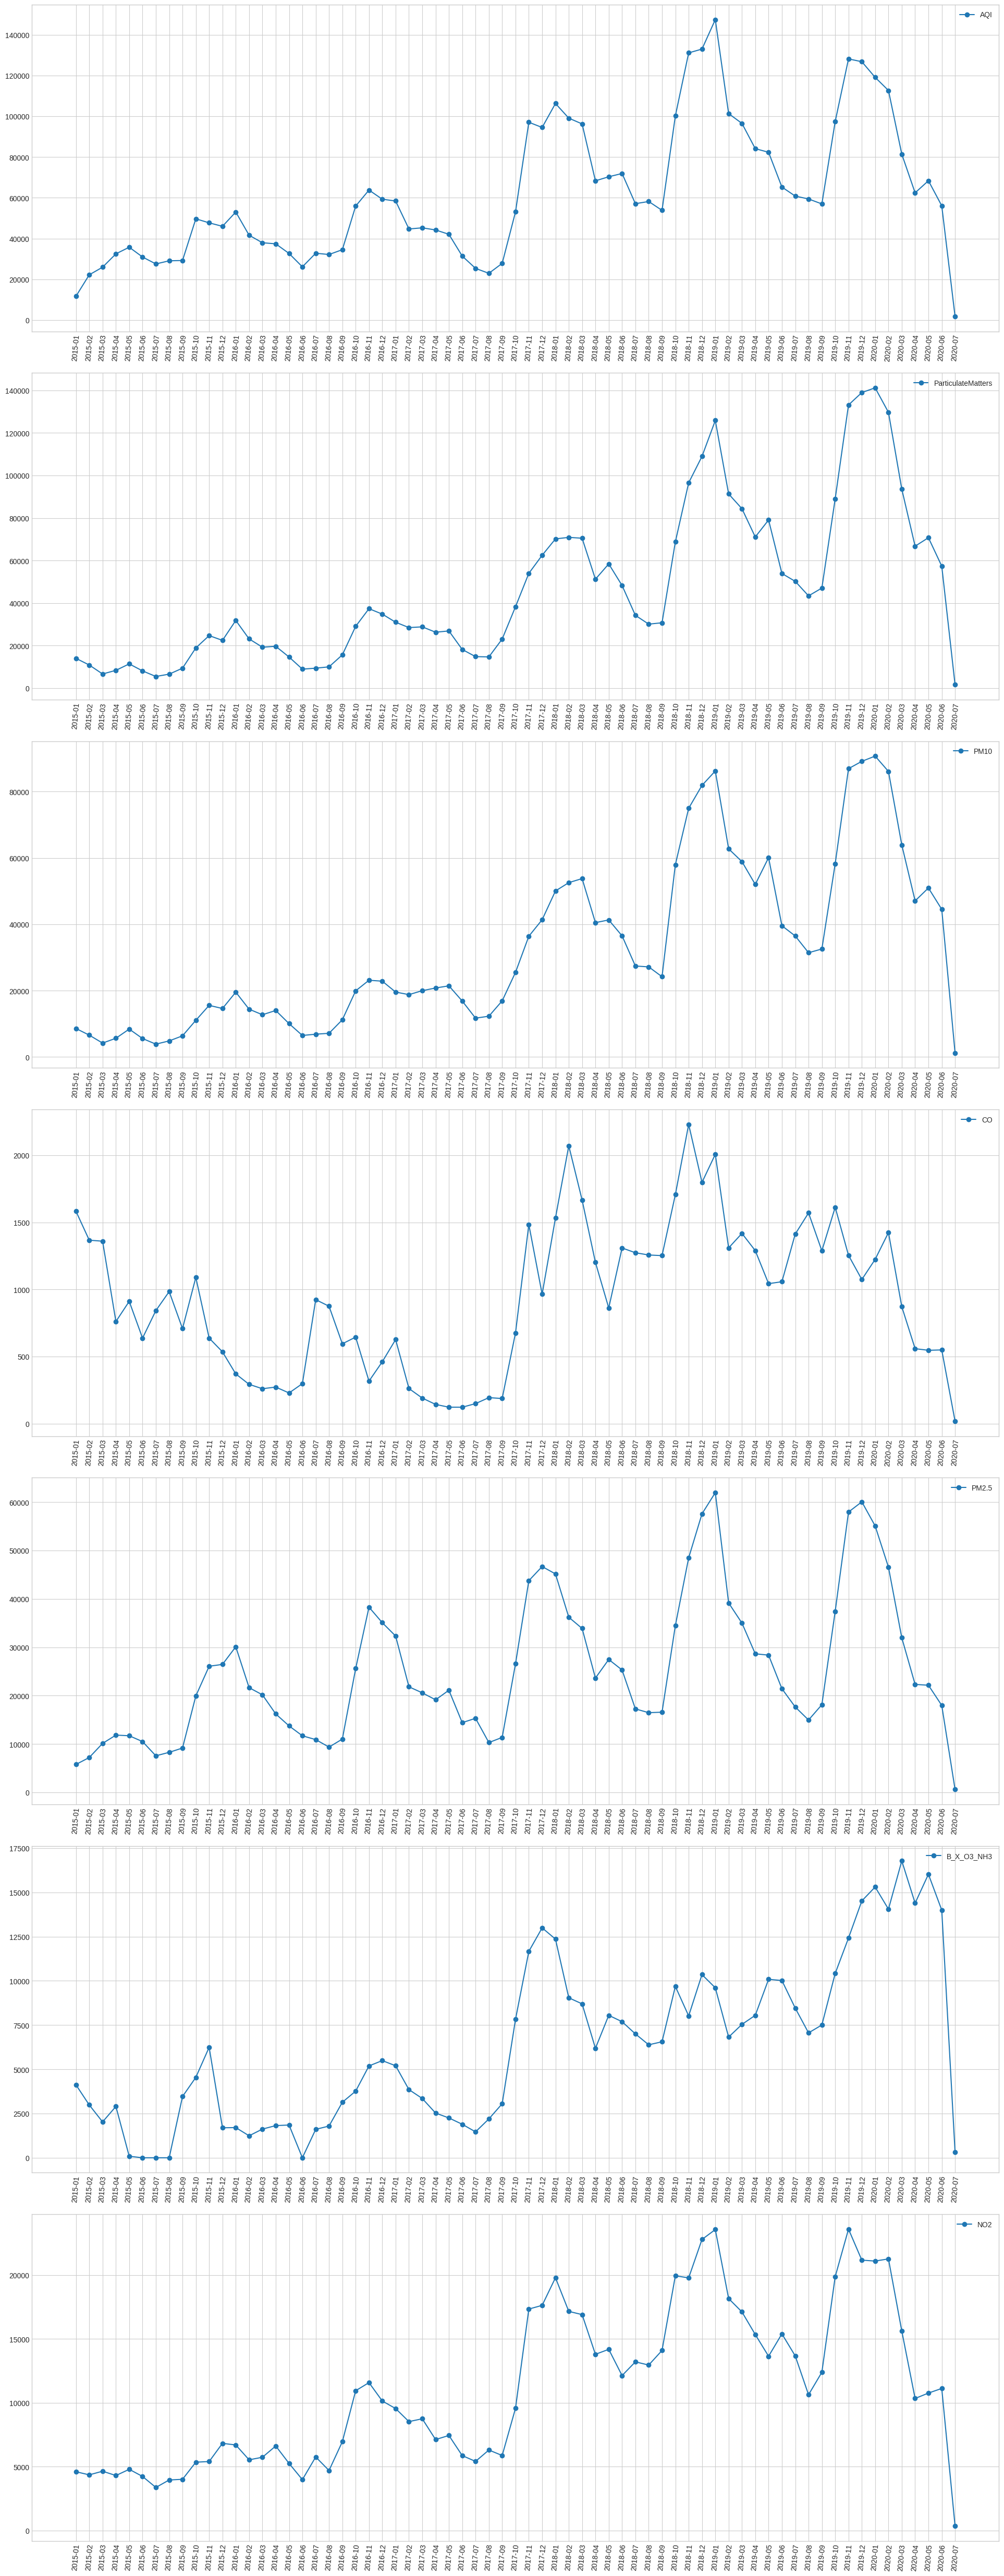

In [ ]:

df = df.groupby(['Year_Month']).sum().reset_index()

plt.style.use('seaborn-whitegrid')
fig, ax_ = plt.subplots(len(metrices), 1, figsize=(20,50))

fig.tight_layout(pad=4)
for i, col in enumerate(metrices):

    x = df['Year_Month']
    y = df[col]
    ax_[i].plot_date(x ,y ,label=col, linestyle="-")
    ax_[i].set_xticklabels(df['Year_Month'], rotation=85);
    ax_[i].legend();

In [ ]:
df

,Year_Month,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,B_X_O3_NH3,ParticulateMatters
0,2015-01,5777.14,8586.11,3210.02,4607.99,5807.26,3791.47,1582.60,5199.96,5319.69,1004.19,1259.71,244.08,11662.0,4123.76,14032.52
1,2015-02,7212.31,6578.31,2445.58,4365.41,5693.59,3977.16,1367.02,3454.44,5734.19,768.22,1512.16,399.48,22198.0,2984.73,10888.08
2,2015-03,10127.70,4186.38,2363.96,4649.34,7217.47,2058.35,1359.34,3283.19,7277.02,2308.36,2773.51,340.14,25940.0,2026.97,6676.86
3,2015-04,11840.63,5639.74,2234.10,4312.09,5790.40,2025.80,761.24,3225.87,6959.54,490.22,865.36,223.23,32486.0,2900.00,8386.61
4,2015-05,11710.61,8402.57,2348.81,4798.67,6125.87,2776.46,911.49,2851.09,7205.99,682.60,1048.13,163.62,35738.0,83.94,11412.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2020-03,31953.52,63929.81,13486.75,15615.22,21043.49,14810.92,871.74,10266.58,26134.27,8799.62,11470.11,954.35,81421.0,16779.49,93571.02
63,2020-04,22317.78,47064.74,9847.89,10339.52,13677.89,12032.18,559.08,7914.62,24630.39,1639.85,2778.66,358.57,62437.0,14389.71,66744.01
64,2020-05,22153.77,50957.11,11145.60,10762.56,15364.64,11169.96,546.93,7746.54,27405.52,2313.60,3196.25,812.76,68383.0,16022.89,70739.97
65,2020-06,17989.37,44520.28,7890.27,11124.00,12254.43,9591.37,549.78,7518.96,22197.05,1668.22,3756.45,654.25,56094.0,13997.78,57393.22


In [ ]:
df2 = pd.read_csv('city_day.csv')
df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df2['PM2.5']=df2['PM2.5'].fillna((df2['PM2.5'].median()))
df2['PM10']=df2['PM10'].fillna((df2['PM10'].median()))
df2['NO']=df2['NO'].fillna((df2['NO'].median()))
df2['NO2']=df2['NO2'].fillna((df2['NO2'].median()))
df2['NOx']=df2['NOx'].fillna((df2['NOx'].median()))
df2['NH3']=df2['NH3'].fillna((df2['NH3'].median()))
df2['CO']=df2['CO'].fillna((df2['CO'].median()))
df2['SO2']=df2['SO2'].fillna((df2['SO2'].median()))
df2['O3']=df2['O3'].fillna((df2['O3'].median()))
df2['Benzene']=df2['Benzene'].fillna((df2['Benzene'].median()))
df2['Toluene']=df2['Toluene'].fillna((df2['Toluene'].median()))
df2['Xylene']=df2['Xylene'].fillna((df2['Xylene'].median()))
df2['AQI']=df2['AQI'].fillna((df2['AQI'].median()))
df2['AQI_Bucket']=df2['AQI_Bucket'].fillna('Moderate')

In [ ]:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df2['City']=le.fit_transform(df2['City'].astype(str))
df2['AQI_Bucket']=le.fit_transform(df2['AQI_Bucket'].astype(str))
df2.info()

categorical_attributes ['Year_Month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  int64  
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 3.6+ MB


In [ ]:
cor = df2.corr()
cor.style.background_gradient(cmap='coolwarm')

<ipython-input-26-70025b75b20a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,1.000000,-0.065294,0.083615,-0.084503,-0.195099,-0.124555,0.103491,-0.251218,-0.183902,-0.014443,-0.063803,-0.138892,-0.100314,-0.210676,-0.221258
PM2.5,-0.065294,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.087813,0.633654,0.202548
PM10,0.083615,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.030257,0.447686,0.078384
NO,-0.084503,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.084393,0.438039,0.097043
NO2,-0.195099,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.188965,0.531952,0.075709
NOx,-0.124555,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.085447,0.436282,0.109835
NH3,0.103491,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,-0.030328,0.097916,-0.044260
CO,-0.251218,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.181215,0.650475,0.100332
SO2,-0.183902,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.249808,0.454182,0.069519
O3,-0.014443,0.166064,0.208398,0.020788,0.289435,0.089095,0.076295,0.043311,0.160489,1.000000,0.023982,0.135498,0.084323,0.199100,-0.065869


# Model Building

In [ ]:
y = df2["AQI_Bucket"]
x = df2[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
#handling data imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({6: 6172, 1: 6172, 5: 6172, 3: 6172, 0: 6172, 2: 6172, 4: 6172})


In [ ]:
#SVM
from sklearn.svm import SVC

cls=SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
svmpred
cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

confussion matrix
[[ 393    0    0    0    0    0    0]
 [   0 2120   56   28    0    0  453]
 [   0    0  822    0    0   19    0]
 [ 141   18    0 2266    0    0    0]
 [   0    0    0    0  377    4    0]
 [   0    0    1    0   11  691    0]
 [   0   98    0    0    0    0 1362]]


accuracy 90.64334085778782


# Deployment